# US15 - Custo Mensal de Água em Cada Parque Relacionado com a Sua Dimensão

## 1. Introdução

## 2. Código e Resultados

In [14]:
# importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
from scipy import stats
import math

In [4]:
# leitura do ficheiro atualizado com o consumo de água
data_updated = pd.read_csv('water_consumption_updated.csv', sep=';', skiprows = 1, names=['Park', 'Year', 'Month', 'Day', 'Consumption'])

data_updated['Month'] = data_updated['Month'].astype(int)
data_updated['Year'] = data_updated['Year'].astype(int)
data_updated['Consumption'] = data_updated['Consumption'].astype(str).str.replace(',', '.').astype(float)

# Leitura do ficheiro com as áreas dos parques
data_area = pd.read_csv('Area.csv', sep=';', skiprows = 1, names=['Park', 'Area'])

data_area['Area'] = data_area['Area'].astype(str).str.replace(',', '.').astype(float)

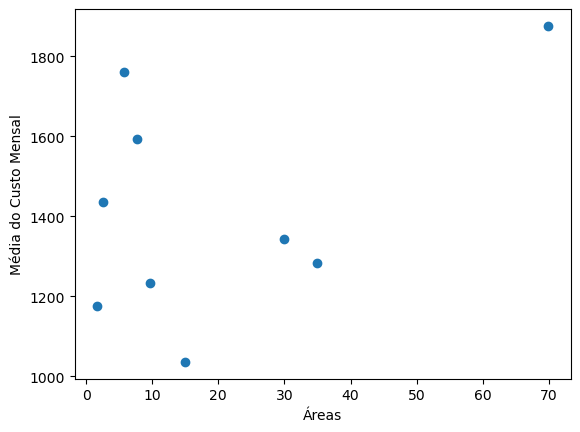


A reta de regressão é c = 1310.923 + 5.315a


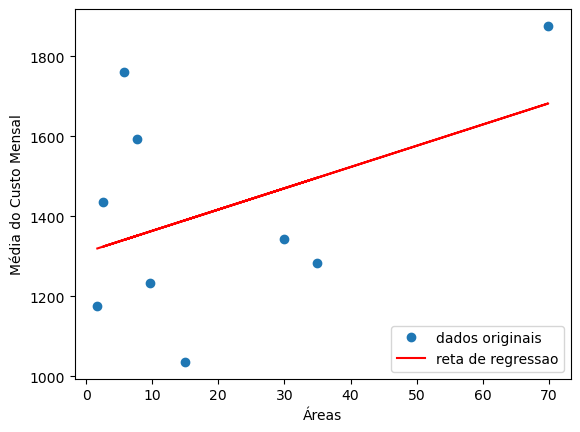

O valor previsto para o Custo Mensal do Parque com 55 hectares é de 1603.22€
O IC com 95% de confiança é [1777.45, 1782.18]


In [35]:
numero_parques = data_area.shape[0]

taxa_base = 0.7  # Taxa base por metro cúbico
limite_superior = 1000 # Limite de consumo para aplicar a taxa base

consumo_mensal = list()
custo_por_mes = list()
media_custo_mensal = list()

for i in range(numero_parques):
    
    for j in range(1, 13):
        dados_filtrados = data_updated[(data_updated['Park'] == data_area.iloc[i, 0]) & (data_updated['Month'] == j)]
        consumo_total = dados_filtrados['Consumption'].sum()
        consumo_mensal.append(consumo_total)
    for k, valor in enumerate(consumo_mensal):
        if valor <= 1000:
            custo_por_mes.append(valor * taxa_base)
        else:
            custo_por_mes.append(valor * (taxa_base + (0.15 * taxa_base)))
            
    media_custo_mensal.append(st.mean(custo_por_mes))
    
areas = list()
areas = data_area['Area'].astype(str).str.replace(',', '.').astype(float).tolist()

plt.plot(areas, media_custo_mensal, 'o')
plt.xlabel('Áreas'); plt.ylabel('Média do Custo Mensal')
plt.show()

# Reta de Regressão
modelo = stats.linregress(areas, media_custo_mensal)
print(f'\nA reta de regressão é c = {modelo.intercept:.3f} + {modelo.slope:.3f}a')
df = pd.DataFrame({'areas':areas, 'media_custo_mensal':media_custo_mensal})
plt.plot(df.areas, df.media_custo_mensal, 'o', label='dados originais')
plt.xlabel('Áreas'); plt.ylabel('Média do Custo Mensal')
plt.plot(df.areas, modelo.intercept + modelo.slope*df.areas, 'r', label='reta de regressao')
plt.legend()
plt.show()

# Previsão do Custo Mensal para um Parque com 55 hectares de área

valor_esperado = modelo.intercept + modelo.slope * 55
print(f'O valor previsto para o Custo Mensal do Parque com 55 hectares é de {valor_esperado:.2f}€')

Saa = 0
Scc = 0
Sac = 0

media_area = np.mean(areas)
media_custo = np.mean(media_custo_mensal)

for area in areas:
    Saa += (area - media_area)**2

for custo in media_custo_mensal:
    Scc += (custo - media_custo)**2
    
for index in range(len(areas)):
    Sac += (areas[index] - media_area) * (media_custo_mensal[index] - media_custo)

    
sqe = Scc - (Sac**2 / Saa)
s2 = sqe/(numero_parques - 2)

t = stats.t.ppf(0.975, numero_parques - 2)

limite_inf = valor_esperado - t + math.sqrt(s2 * ((1/numero_parques) + ((55 - media_area)**2)/Saa))
limite_sup = valor_esperado + t + math.sqrt(s2 * ((1/numero_parques) + ((55 - media_area)**2)/Saa))

print(f'O IC com 95% de confiança é [{limite_inf:.2f}, {limite_sup:.2f}]')

## 3. Análise e Interpretação dos Resultados

# US16 - Determinar a Melhor Linha que se Ajusta aos Dados Obtidos na US14

## Introdução

## Código e Resultados

In [ ]:
# importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# leitura do ficheiro
data = pd.read_csv('EquipmentUsed.csv', sep=';', skiprows = 1, names=['Equipment'])

## Análise e Interpretação de Resultados

## Contribuição dos Elementos do Grupo

**Diogo Pereira** = 35%

**Diogo Veiros** = 35%

**José Alves** = 15%

**Tiago Sampaio** = 15%